In [51]:
import collections

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
import numpy as np
from bs4 import BeautifulSoup

### Unindo os datasets
Unir as notas de bechdel com elenco e equipe com o merge:
- O primeiro parâmetro passado é dataframe da "esquerda" e o segundo, da direita. Os dois próximos parâmetros (`left_on` e `right_on`) dizem quais colunas serão consideradas pra fazer o merge. O `how='inner'` calcula a interseção entre essas duas colunas.

Primeiro é feito o merge do links_df com o bechdel_df, pois bechdel_df não possui o tmdbid diretamente, mas os outros sim.
obs.: o 'id' no `credits.csv` e no `movies_metadata.csv` é o tmdbid.

`reset_index(drop='True')` = reseta os indexes sem criar uma nova coluna para eles.

In [14]:
bechdel_df = pd.read_csv('datasets/Bechdel_detailed.csv')
links_df = pd.read_csv('datasets/movie-dataset/links.csv') # contém o id do imdb e tmdb de cada filme.
credits_df = pd.read_csv('datasets/movie-dataset/credits.csv')
imdb_df = pd.read_csv('datasets/movie-dataset/movies_metadata.csv')

# remove colunas não usadas.
bechdel_df = bechdel_df.drop(['Unnamed: 0', 'submitterid', 'date', 'visible', 'id'], axis=1)

# renomeia rating para não coincidir com o dos outros datasets.
bechdel_df = bechdel_df.rename(columns={'rating': 'bt_score'})

# junta os 3 dataframes e descarta colunas duplicadas.
bechdel_df = pd.merge(bechdel_df, links_df, left_on='imdbid', right_on='imdbId', how='inner').drop('imdbId', axis=1)
bechdel_df = pd.merge(bechdel_df, credits_df, left_on='tmdbId', right_on='id', how='inner').drop(['id', 'movieId'], axis=1)

# UNINDO COM O MOVIES_METADATA.CSV

# transforma o dtype de todos os elementos das colunas para float.
imdb_df['id'] = pd.to_numeric(imdb_df['id'], errors='coerce')
imdb_df.budget = pd.to_numeric(imdb_df.budget, errors='coerce')
imdb_df.popularity = pd.to_numeric(imdb_df.popularity, errors='coerce')

# remove colunas não usadas.
imdb_df = imdb_df.drop(['adult', 'belongs_to_collection', 'homepage', 'original_title', 'overview', 'poster_path', 'release_date', 'spoken_languages', 'status', 'tagline', 'video', 'title'], axis=1)

# faz o df final.
bechdel_df = pd.merge(bechdel_df, imdb_df, left_on='tmdbId', right_on='id', how='inner').drop('id', axis=1)

# DESCARTA VALORES VAZIOS e reseta o index.
bechdel_df = bechdel_df[
	(bechdel_df.cast != '[]')
	& (bechdel_df.crew != '[]')
	& (bechdel_df.runtime != 0)
	& (bechdel_df.vote_count != 0)
	& (bechdel_df.vote_average != 0)
	& (bechdel_df.original_language != 'xx')
	& (bechdel_df.genres != '[]')
	].reset_index(drop='True')

/var/folders/x5/46svw_qj6hs7h_f0d9_k70rc0000gn/T/ipykernel_837/1154578044.py:4: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  imdb_df = pd.read_csv('datasets/movie-dataset/movies_metadata.csv')


,title,year,bt_score,dubious,imdbid,tmdbId,cast,crew,budget,genres,imdb_id,original_language,popularity,production_companies,production_countries,revenue,runtime,vote_average,vote_count
0,Sallie Gardner at a Gallop,1878.0,0.0,0.0,2221420.0,194079.0,"[{'cast_id': 5, 'character': 'Herself - Sallie...","[{'credit_id': '52fe4ce29251416c91103327', 'de...",0.0,"[{'id': 99, 'name': 'Documentary'}]",tt2221420,en,0.327841,"[{'name': 'Palo Alto Stock Farm', 'id': 84748}]","[{'iso_3166_1': 'US', 'name': 'United States o...",0.0,1.0,6.2,25.0
1,"Monkeyshines, No. 1",1890.0,0.0,0.0,361921.0,32571.0,"[{'cast_id': 10, 'character': 'Himself', 'cred...","[{'credit_id': '52fe44d99251416c9101ef9f', 'de...",0.0,"[{'id': 35, 'name': 'Comedy'}]",tt0361921,en,1.163672,"[{'name': 'Edison Manufacturing Company', 'id'...","[{'iso_3166_1': 'US', 'name': 'United States o...",0.0,1.0,4.3,15.0
2,Je vous aime,1891.0,0.0,0.0,3201916.0,336380.0,"[{'cast_id': 0, 'character': 'Himself', 'credi...","[{'credit_id': '553266c4925141631000227d', 'de...",0.0,"[{'id': 99, 'name': 'Documentary'}]",tt3201916,fr,0.212894,[],"[{'iso_3166_1': 'FR', 'name': 'France'}]",0.0,1.0,3.3,3.0
3,Buffalo Dance,1894.0,0.0,0.0,309402.0,155107.0,"[{'cast_id': 1, 'character': 'Himself', 'credi...","[{'credit_id': '52fe4b749251416c910daee3', 'de...",0.0,"[{'id': 99, 'name': 'Documentary'}]",tt0309402,en,0.205698,"[{'name': 'Edison Manufacturing Company', 'id'...","[{'iso_3166_1': 'US', 'name': 'United States o...",0.0,1.0,3.8,6.0
4,Carmencita,1894.0,0.0,0.0,1.0,16612.0,"[{'cast_id': 1, 'character': 'Herself', 'credi...","[{'credit_id': '52fe46de9251416c75086305', 'de...",0.0,"[{'id': 99, 'name': 'Documentary'}]",tt0000001,en,1.273072,"[{'name': 'Edison Manufacturing Company', 'id'...","[{'iso_3166_1': 'US', 'name': 'United States o...",0.0,1.0,4.9,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7547,War Machine,2017.0,0.0,0.0,4758646.0,354287.0,"[{'cast_id': 0, 'character': 'Gen. Glen McMaho...","[{'credit_id': '575e8224c3a3681f7d000f46', 'de...",60000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",tt4758646,en,10.282732,"[{'name': 'Plan B Entertainment', 'id': 45778}...","[{'iso_3166_1': 'US', 'name': 'United States o...",0.0,122.0,5.8,243.0
7548,Burning Sands,2017.0,2.0,0.0,5826432.0,426265.0,"[{'cast_id': 6, 'character': 'Zurich', 'credit...","[{'credit_id': '58627bed92514115cf03fc87', 'de...",0.0,"[{'id': 18, 'name': 'Drama'}]",tt5826432,en,2.155753,[],[],0.0,105.0,6.3,30.0
7549,"Midwife, The",2017.0,3.0,0.0,5348236.0,439154.0,"[{'cast_id': 2, 'character': 'Claire', 'credit...","[{'credit_id': '5895b2819251412e0d0088fb', 'de...",0.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",tt5348236,fr,2.127205,"[{'name': 'France 3 Cinéma', 'id': 591}, {'nam...","[{'iso_3166_1': 'BE', 'name': 'Belgium'}, {'is...",0.0,117.0,6.2,21.0
7550,12 feet deep,2017.0,3.0,0.0,5143226.0,459928.0,"[{'cast_id': 0, 'character': 'McGradey', 'cred...","[{'credit_id': '592ec68d92514130da00d716', 'de...",0.0,"[{'id': 53, 'name': 'Thriller'}]",tt5143226,en,4.479536,"[{'name': 'Citizen Skull Productions', 'id': 9...","[{'iso_3166_1': 'US', 'name': 'United States o...",0.0,85.0,5.1,62.0


### Calculando valores nulos.
Porcentagem de valores nulos em cada categoria. Ao correlacionar categorias, só os filmes que possuírem todas as envolvidas serão utilizados.

In [3]:
total = len(bechdel_df) * 0.01
print('Valores nulos:')
print('Orçamento: %.2f%%' % (len(bechdel_df[bechdel_df.budget == 0])/total))
print('Bilheteria: %.2f%%' % (len(bechdel_df[bechdel_df.revenue == 0])/total))
print('Produtoras: %.2f%%' % (len(bechdel_df[bechdel_df.production_companies == '[]'])/total))
print('Países: %.2f%%' % (len(bechdel_df[bechdel_df.production_countries == '[]'])/total))

# Nulos removidos:
# print('Duração: %.2f%%' % (len(bechdel_df[bechdel_df.runtime == 0])/total))
# print('Número de votos: %.2f%%' % (len(bechdel_df[bechdel_df.vote_count == 0])/total))
# print('Nota média: %.2f%%' % (len(bechdel_df[bechdel_df.vote_average == 0])/total))
# print('Língua: %.2f%%' % (len(bechdel_df[bechdel_df.original_language == 'xx'])/total))
# print('Gênero: %.2f%%' % (len(bechdel_df[bechdel_df.genres == '[]'])/total))


Valores nulos:
Orçamento: 46.54%
Bilheteria: 46.69%
Produtoras: 5.68%
Países: 1.84%


# Gráficos simples

### Filmes por nota no teste de Bechdel
**Métodos utilizados**
- `collections.Counter()`: conta os valores totais das notas de 0 a 3.
- `DataFrame.from_dict(data, orient='index')`: transforma um dicionário em DataFrame. `orient='index'` faz com que as keys do dicionário sejam usadas como index.

[Text(0.5, 1.0, 'Notas dos filmes no teste de Bechdel')]

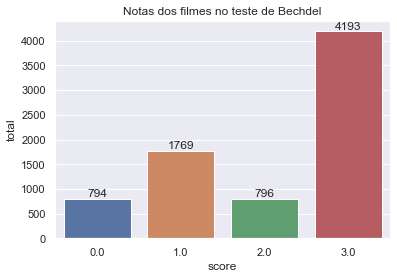

In [4]:
# TOTAL DE FILMES POR NOTA.
# score_df = df com a quantidade de filmes por nota.
score_df = collections.Counter(bechdel_df.bt_score)
score_df = pd.DataFrame.from_dict(score_df, orient='index').reset_index()
score_df = score_df.rename(columns={'index': 'score', 0: 'total'})
score_plot = sns.barplot(x='score', y='total', data=score_df)
score_plot.bar_label(score_plot.containers[0])
score_plot.set(title='Notas dos filmes no teste de Bechdel')

[0.0, 1.0, 3.0, 2.0]

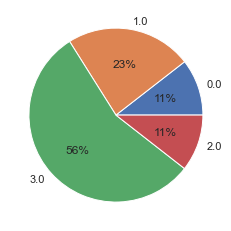

In [26]:
# PORCENTAGEM DOS FILMES
plt.pie(score_df.total, labels = score_df.score.to_list(), autopct='%.0f%%')
score_df.score.to_list()

<AxesSubplot:>

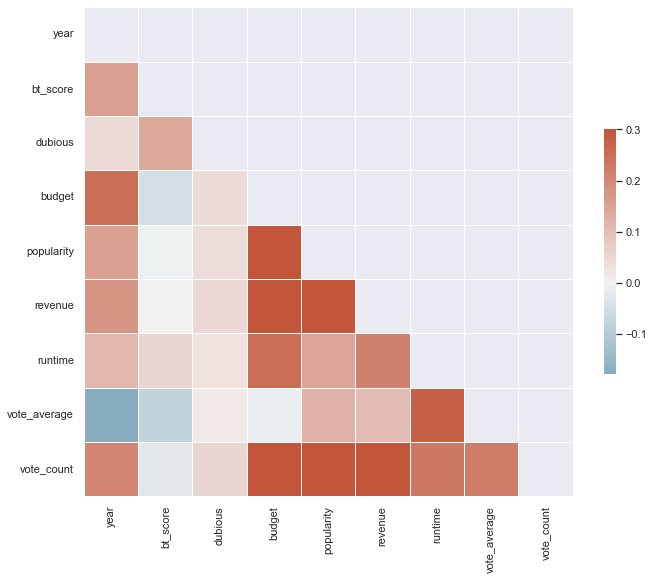

In [57]:
# GRÁFICO DE CORRELAÇÃO
# num_df = df com todas as colunas de valores numéricos. Exceto os ids.

num_df = bechdel_df[['year', 'bt_score', 'dubious', 'budget', 'popularity', 'revenue', 'runtime', 'vote_average', 'vote_count']]
corr = num_df.corr()
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})